# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

Desafio desenvolvido para a Aceleração de Data Science da Codenation.

https://www.codenation.dev/

## _Set up_ da análise

In [12]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
black_friday = pd.read_csv("black_friday.csv")

# create a dataset copy
df = black_friday.copy()

## Inicie sua análise a partir daqui

In [3]:
# check if the dataset format is correct.
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [32]:
#return df shape

def q1():
    return df.shape

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [7]:
# print how many observations there are in each age category
df.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [28]:
# filter women between '25-35' years old and return how many there are.

def q2():
    women_age = black_friday.loc[(black_friday.Gender == 'F') & (black_friday.Age == '26-35')].shape[0]
    return women_age

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [33]:
# return how many unique identifications there are in User_ID column

def q3():
    return len(df.User_ID.unique())

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [4]:
# return the different object types that there are in the dataset.

def q4():
    return len(black_friday.dtypes.unique())

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [48]:
def q5():
    # get how many null values there are in each row
    rows_na = df.isna().sum(axis=1)
    
    # get how many rows have null values
    rows_na_sum = np.count_nonzero(rows_na)
    
    # get the %
    rows_na_perc = rows_na_sum/len(df)
    
    return rows_na_perc

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [6]:
# checking the null values in each column, sum it and getting the max value.

def q6():
    return df.isna().sum().max()

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [127]:
# get the Product Category 3 frequency and print the category most frequent

def q7():
    return df.Product_Category_3.value_counts().index[0]

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

Text(0.5, 1.0, 'Purchase before normalization')

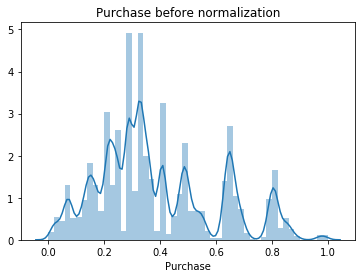

In [13]:
# plot Purchase before normalization
sns.distplot(df.Purchase)
plt.title('Purchase before normalization')

In [7]:
# reshape the Purchase column 
purch_norm = np.array(df["Purchase"]).reshape(-1, 1)
    
# import the function from sklearn
from sklearn.preprocessing import MinMaxScaler
    
# choose the function
scaler = MinMaxScaler()
    
#trasnform the data
punch_normalized = scaler.fit_transform(purch_norm)
df.Purchase = punch_normalized

In [6]:
def q8():
    return df.Purchase.mean()

Text(0.5, 1.0, 'Normalized Purchase')

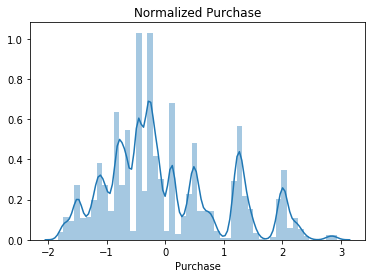

In [19]:
# plot Purchase after normalization
sns.distplot(df.Purchase)
plt.title('Normalized Purchase')

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [17]:
# standardize the purchase column
df.Purchase = (df.Purchase - df.Purchase.mean()) / df.Purchase.std()

In [26]:
def q9():
    # filter the data
    return len(df.loc[(df.Purchase >= -1) & (df.Purchase <= 1)])

Text(0.5, 1.0, 'Normalized and Standardized Purchase')

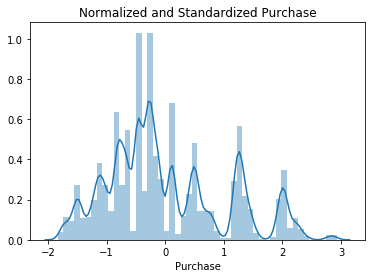

In [21]:
# plot Purchase after normalization
sns.distplot(df.Purchase)
plt.title('Normalized and Standardized Purchase')

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [100]:
def q10():
    # filter the na values in the Product_Category_2
    cat2_na = black_friday.loc[black_friday['Product_Category_2'].isna()]
    # check if the na values are na values in the Product_Category_3
    cat2_3 = bool(len(cat2_na) == cat2_na['Product_Category_3'].isna().sum())
    return cat2_3